In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import usefulfuncs as uff

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png')
from IPython.core.pylabtools import figsize
figsize(10, 6) # Width and hight
#plt.style.use('seaborn-white')


In [31]:
# read data
data = pd.read_csv("train.csv")
data.head()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,Female
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,Male
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,Male
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,Male
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,Male


In [32]:
# Get headers / categories
cols = list(data.columns)
cols

['Number words female',
 'Total words',
 'Number of words lead',
 'Difference in words lead and co-lead',
 'Number of male actors',
 'Year',
 'Number of female actors',
 'Number words male',
 'Gross',
 'Mean Age Male',
 'Mean Age Female',
 'Age Lead',
 'Age Co-Lead',
 'Lead']

In [33]:
#pd.plotting.scatter_matrix(data.iloc[:,2:4])
#data.iloc[:,1] 
#data['Total words'].tolist()
#data.iloc[1,:].tolist()

In [51]:
train,test = uff.train2tt(data,0.674)

In [52]:
len(train)

700

In [7]:
"""model = skl_nb.KNeighborsClassifier(n_neighbors=12)

X_train = train[[cols[0], cols[2]]]
Y_train = train[cols[-1]]

X_test = test[[cols[0], cols[2]]]
Y_test = test[cols[-1]]

model.fit(X_train, Y_train)

print('Model summary:')
print(model)"""


"model = skl_nb.KNeighborsClassifier(n_neighbors=12)\n\nX_train = train[[cols[0], cols[2]]]\nY_train = train[cols[-1]]\n\nX_test = test[[cols[0], cols[2]]]\nY_test = test[cols[-1]]\n\nmodel.fit(X_train, Y_train)\n\nprint('Model summary:')\nprint(model)"

In [8]:
"""prediction = model.predict(X_test)
print('Confusion matrix:\n')
print(pd.crosstab(prediction, Y_test), '\n')
print(f"Accuracy: {np.mean(prediction == Y_test):.3f}")"""

'prediction = model.predict(X_test)\nprint(\'Confusion matrix:\n\')\nprint(pd.crosstab(prediction, Y_test), \'\n\')\nprint(f"Accuracy: {np.mean(prediction == Y_test):.3f}")'

In [9]:
def kNN_whatN(N):
    model = skl_nb.KNeighborsClassifier(n_neighbors=N)

    X_train = train[[cols[0], cols[2]]]
    Y_train = train[cols[-1]]

    X_test = test[[cols[0], cols[2]]]
    Y_test = test[cols[-1]]

    model.fit(X_train, Y_train)

    # cell 2
    
    prediction = model.predict(X_test)
    accuary = np.mean(prediction== Y_test)
    return accuary
    

In [10]:
frm = 1
too = 100
AccuracyA = np.empty([2, too-frm])
for n in range(frm,too):
    Accy = kNN_whatN(n)
    AccuracyA[0,n-1] = n
    AccuracyA[1,n-1] = Accy
    

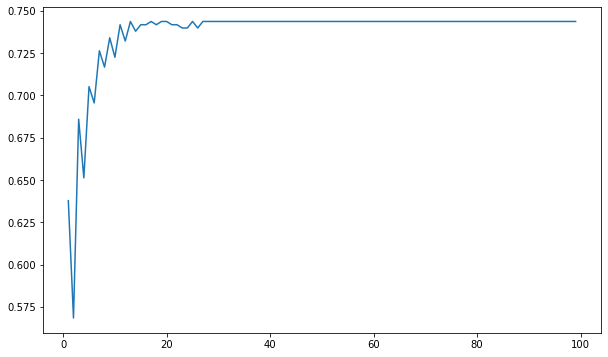

In [11]:
plt.plot(AccuracyA[0],AccuracyA[1])